# **CVPS20 // Convolutional Neural Networks with TF/Keras: 3-color images**

*November 5, 2020*

This notebook will continue introducing the Tensorflow/Keras framework for constructing and training CNNs using 3-color images.

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
# plt.style.use("seaborn-dark")
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

---

#### **Load the Data and Create Training/Testing Sets**

In [4]:
# -- load data in RGB
ellip = np.load("/content/drive/My Drive/cvps20/data/galaxy_zoo/galaxy_zoo_elliptical.npy") / 255.
spiral = np.load("/content/drive/My Drive/cvps20/data/galaxy_zoo/galaxy_zoo_spiral.npy") / 255.

In [5]:
# -- concatenate
gals = np.concatenate((ellip, spiral), axis=0)

In [6]:
def conf_matrix_plot(cmat):
  """ Visulize a confusion matrix. """

  # -- initialize the plot
  fig, ax = plt.subplots()

  # -- show the confusion matrix
  im = ax.imshow(cmat, cmap="viridis")

  # -- set the tick labels
  ax.set_xticks(range(2))
  ax.set_yticks(range(2))
  ax.set_xticklabels(["ellip", "spiral"])
  ax.set_yticklabels(["ellip", "spiral"])

  # -- label the axes
  ax.set_ylabel("true label")
  ax.set_xlabel("predicted label")

  # -- print the number in each cell
  for ii in range(2):
    for jj in range(2):
      ax.text(jj, ii, cmat[ii, jj], color="orangered", ha="center", va="center")

  # -- show the figure
  fig.show()

  return

---

...we can also use *color* information,

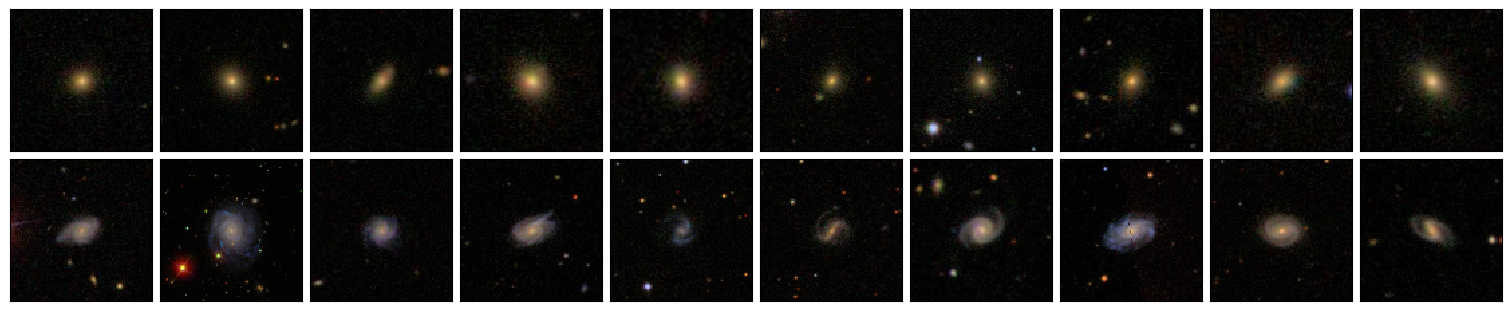

In [9]:
fig, ax = plt.subplots(2, 10, figsize=[15, 3],
                       subplot_kw={"xticks": [], "yticks": []},
                       layout="constrained")
for ii in range(10):
  ax[0, ii].imshow(ellip[ii])
for ii in range(10):
  ax[1, ii].imshow(spiral[ii])
fig.show()

In [10]:
# -- create features arrays
feat = gals

# -- create the target
targ = np.concatenate((np.full(5000, 0), np.full(5000, 1)))

# -- generate a training/testing set
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, train_size=4000, test_size=1000, random_state=302)

In [11]:
feat_tr.shape

(4000, 106, 106, 3)

In [12]:
# -- define the layers
layer0 = keras.layers.Input(shape=(106, 106, 3))
layer1 = keras.layers.Conv2D(32, (5, 5), activation="relu", kernel_regularizer=keras.regularizers.l2(0.01))
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Conv2D(64, (5, 5), activation="relu", kernel_regularizer=keras.regularizers.l2(0.01))
layer4 = keras.layers.MaxPool2D((2, 2))
layer5 = keras.layers.Flatten()
layer6 = keras.layers.Dense(1024, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01))
layer7 = keras.layers.Dense(2, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.01))

layers = [layer1, layer2, layer3, layer4, layer5, layer6, layer7]

# -- instantiate the model
model = keras.Sequential(layers)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [13]:
# -- fit the model
history = model.fit(feat_tr, targ_tr, epochs=50, batch_size=100, validation_split=0.2, verbose=1)

# -- evaluate the training and testing accuracy
loss_tr, acc_tr = model.evaluate(feat_tr, targ_tr, batch_size=1, verbose=0)
loss_te, acc_te = model.evaluate(feat_te, targ_te, batch_size=1, verbose=0)

print("Training accuracy : {0:.4f}".format(acc_tr))
print("Testing accuracy  : {0:.4f}".format(acc_te))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 156s 5s/step - accuracy: 0.6135 - loss: 8.2718 - val_accuracy: 0.8388 - val_loss: 0.9161
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 200s 5s/step - accuracy: 0.8320 - loss: 0.7805 - val_accuracy: 0.7812 - val_loss: 0.6613
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 150s 5s/step - accuracy: 0.8525 - loss: 0.5601 - val_accuracy: 0.8512 - val_loss: 0.5436
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 199s 5s/step - accuracy: 0.8605 - loss: 0.5338 - val_accuracy: 0.9137 - val_loss: 0.4497
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 204s 5s/step - accuracy: 0.9021 - loss: 0.4530 - val_accuracy: 0.9000 - val_loss: 0.4316
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 203s 5s/step - accuracy: 0.9027 - loss: 0.4365 - val_accuracy: 0.8687 - val_loss: 0.5150
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 200s 5s/step - accuracy: 0.9023 - loss: 0.4466 - val_accuracy: 0.9075 - val_loss: 0.4042
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step - accuracy: 0.9055 - loss: 0.4082 - val_accuracy: 0.9262 - v

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (100, 102, 102, 32)         │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (100, 51, 51, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (100, 47, 47, 64)           │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (100, 23, 23, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (100, 33856)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (100, 1024)                 │      34,669,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (100, 2)                    │           2,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,175,944 (397.40 MB)

 Trainable params: 34,725,314 (132.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,450,630 (264.93 MB)

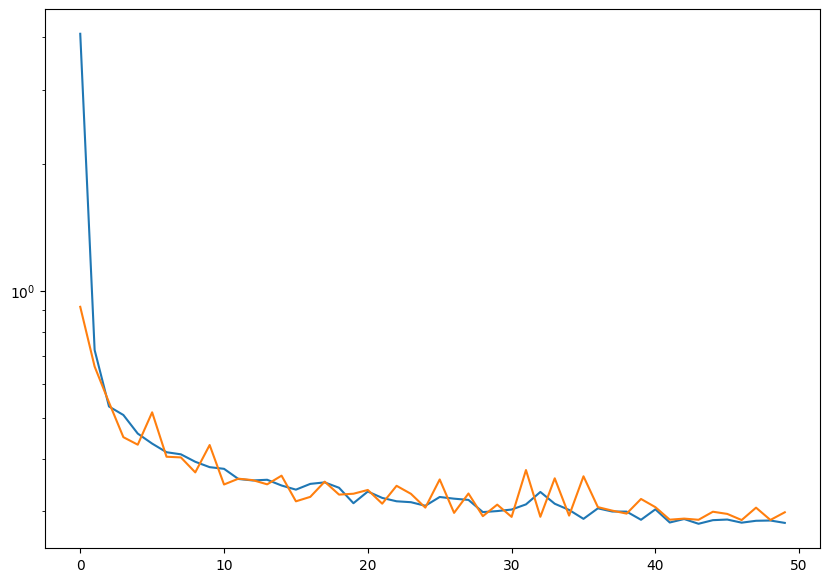

In [18]:
# -- plot the loss function
fig, ax = plt.subplots()
ax.plot(history.history["loss"])
ax.plot(history.history["val_loss"])
ax.set_yscale("log")
fig.show()